<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prophet" data-toc-modified-id="Prophet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prophet</a></span></li><li><span><a href="#ДРУГИМ-СПОСОБОМ" data-toc-modified-id="ДРУГИМ-СПОСОБОМ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ДРУГИМ СПОСОБОМ</a></span></li><li><span><a href="#begin" data-toc-modified-id="begin-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>begin</a></span></li></ul></div>

## Prophet

In [3]:
import pandas as pd

In [79]:
df = pd.read_csv('Sessions.csv')

In [80]:
df = df.T.reset_index()

In [81]:
df = df.rename(columns = {df.columns[0]:'ds',df.columns[1]:'y'})[1:-1]

In [82]:
df

,ds,y
1,2022-09-28,6605.18535
2,2022-09-29,6675.947471
3,2022-09-30,6552.34829
4,2022-10-01,6688.666749
5,2022-10-02,6848.113455
...,...,...
86,2022-12-22,6064.783639
87,2022-12-23,6175.293128
88,2022-12-24,5775.234809
89,2022-12-25,5621.032962


<AxesSubplot:>

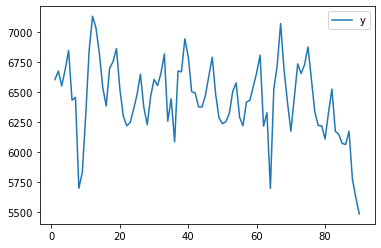

In [83]:
df.plot()

In [84]:
#pip install prophet

In [85]:
from prophet import Prophet

In [86]:
m = Prophet()
m.fit(df)

16:27:15 - cmdstanpy - INFO - Chain [1] start processing
16:27:16 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
450,2023-12-22
451,2023-12-23
452,2023-12-24
453,2023-12-25
454,2023-12-26


In [88]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
450,2023-12-22,-4641.442706,-8831.918677,-467.105325
451,2023-12-23,-4514.027730,-8656.337130,-341.542558
452,2023-12-24,-4465.442068,-8603.499318,-258.558343
453,2023-12-25,-4809.431025,-9035.222869,-527.159886
454,2023-12-26,-4889.167292,-9083.971381,-753.244175


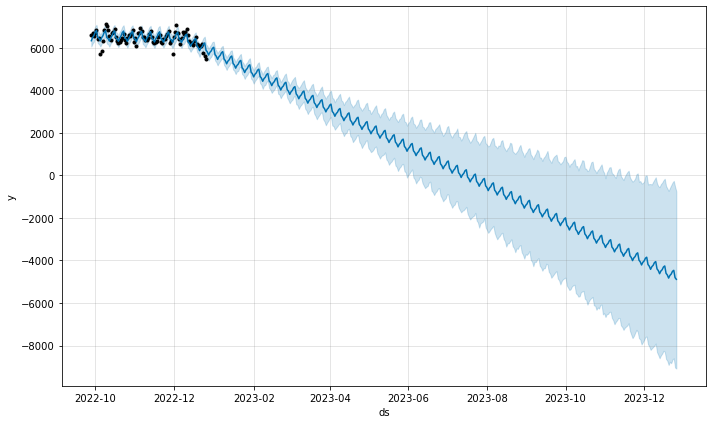

In [89]:
fig1 = m.plot(forecast)

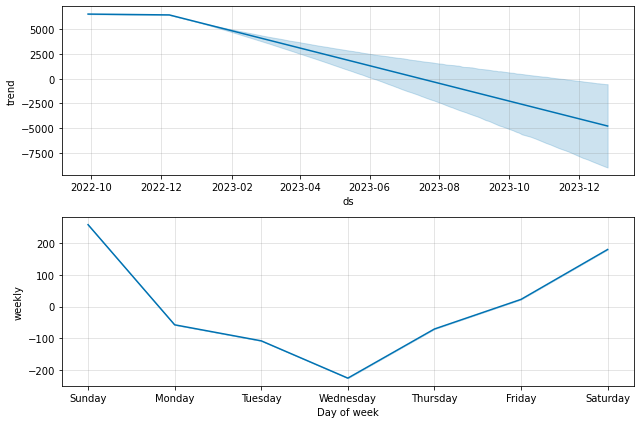

In [90]:
fig2 = m.plot_components(forecast)

## ДРУГИМ СПОСОБОМ
https://machinelearningmastery.ru/decompose-time-series-data-trend-seasonality/

In [105]:
df = df.set_index('ds')

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df['y']
result = seasonal_decompose(series, model='additive', period = 7)
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)


# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)

In [124]:
df.index

Index(['2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
       '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
       '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
       '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
       '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
       '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
       '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
       '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
       '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
       '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16',
       '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21',
       '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26',
       '2022-11-27', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',

C:\Users\new pc\AppData\Local\Temp\ipykernel_22460\1563179052.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


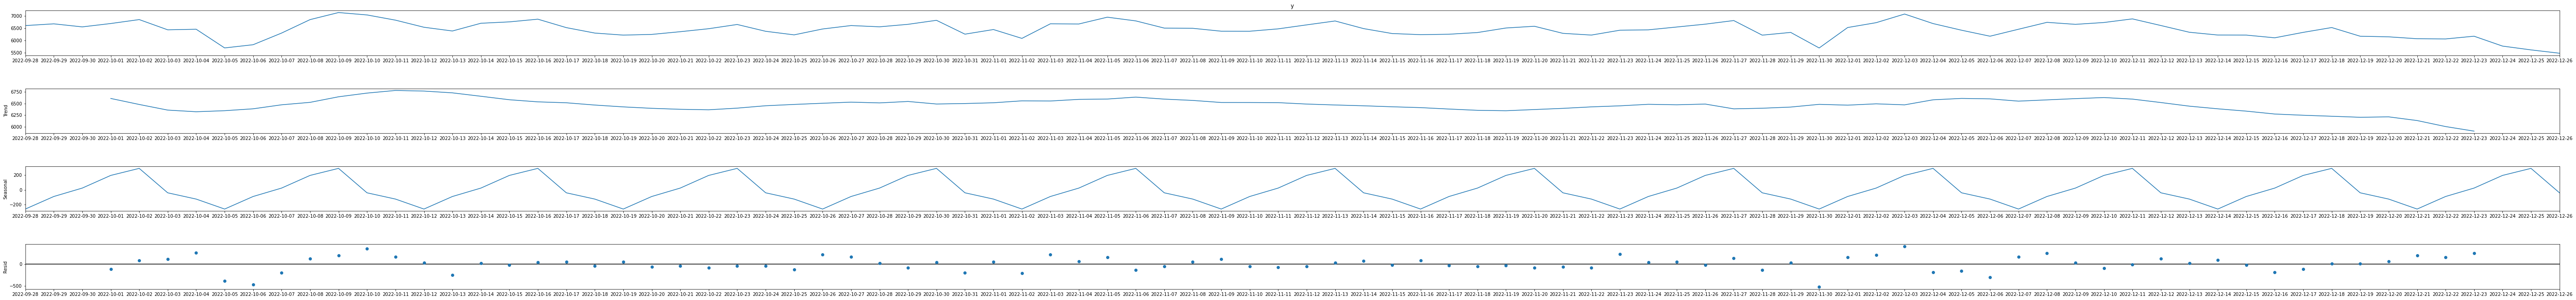

In [134]:
fig = result.plot()
fig.set_size_inches(100.5, 10.5)
fig.show()

In [96]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = df['y']
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [98]:
type(df['y'])

pandas.core.series.Series

## begin

In [9]:
# Python
import pandas as pd
from prophet import Prophet

In [24]:
df = pd.read_csv('Sessions.csv').T
df = df.reset_index().rename(columns = {'index':'ds',0:'y'})[1:]

In [52]:
df.iloc[10]['y'] = 12000.00001

In [42]:
df.shape

(91, 2)

In [43]:
m = Prophet()
m.fit(df)

18:56:34 - cmdstanpy - INFO - Chain [1] start processing
18:56:34 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Python
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
93,2022-12-30
94,2022-12-31
95,2023-01-01
96,2023-01-02
97,2023-01-03


In [45]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2022-12-30,5920.318930,4930.433409,6825.146809
94,2022-12-31,6463.676453,5565.564140,7450.015842
95,2023-01-01,6135.554913,5189.001090,7084.264888
96,2023-01-02,5811.395763,4878.262835,6724.363691
97,2023-01-03,5408.308686,4462.749678,6361.387992


In [50]:
forecast[:3]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-28,6898.320006,5748.756983,7549.241785,6898.320006,6898.320006,-242.617356,-242.617356,-242.617356,-242.617356,-242.617356,-242.617356,0.0,0.0,0.0,6655.702650
1,2022-09-29,6888.631179,5865.297812,7772.790034,6888.631179,6888.631179,-83.307720,-83.307720,-83.307720,-83.307720,-83.307720,-83.307720,0.0,0.0,0.0,6805.323459
2,2022-09-30,6878.942352,5935.316335,7814.984518,6878.942352,6878.942352,12.518047,12.518047,12.518047,12.518047,12.518047,12.518047,0.0,0.0,0.0,6891.460399


In [54]:
df[(df['y'] > forecast['yhat_upper'])]

ValueError: Can only compare identically-labeled Series objects

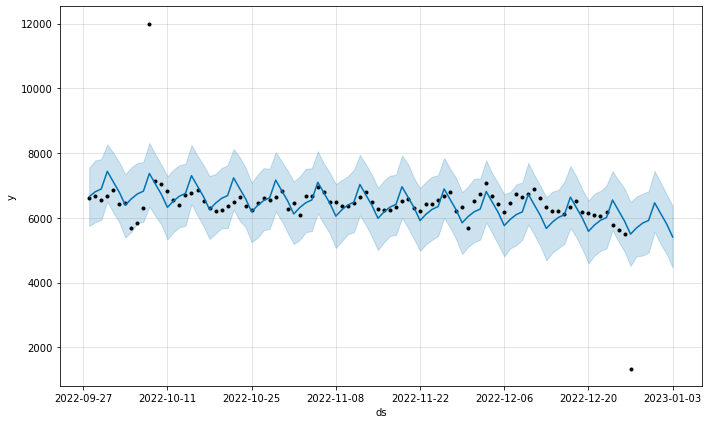

In [46]:
# Python
fig1 = m.plot(forecast)


In [2]:
pip install fbprophet

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv('Sessions.csv')

In [8]:
df.T

,0
Segment,user_level ≥ 100
2022-09-28,6605.18535
2022-09-29,6675.947471
2022-09-30,6552.34829
2022-10-01,6688.666749
...,...
2022-12-23,6175.293128
2022-12-24,5775.234809
2022-12-25,5621.032962
2022-12-26,5486.515394
